This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** July 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the testing script for solving using a CutFEM scheme the FIXED-boundary plasma boundary problem with LINEAR plasma current model.

The problem is solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

# DEFINE EQUILIBRIUM PROBLEM PARAMETERS

In [1]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

## CREATE GRAD-SHAFRANOV PROBLEM
Equilibrium = GradShafranovSolver()

## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Equilibrium.FIXED_BOUNDARY = True
Equilibrium.GhostStabilization = True
Equilibrium.PARALLEL = False

##### OUTPUT PLOTS IN RUNTIME
Equilibrium.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Equilibrium.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Equilibrium.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Equilibrium.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Equilibrium.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Equilibrium.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Equilibrium.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Equilibrium.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Equilibrium.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Equilibrium.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Equilibrium.dim = 2                    # PROBLEM SPATIAL DIMENSION
Equilibrium.QuadratureOrder2D = 8      # ORDER OF SURFACE NUMERICAL INTEGRATION QUADRATURES 
Equilibrium.QuadratureOrder1D = 5      # ORDER OF LENGTH NUMERICAL INTEGRATION QUADRATURES 
Equilibrium.ext_maxiter = 5            # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Equilibrium.ext_tol = 1.0e-3           # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Equilibrium.int_maxiter = 10           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Equilibrium.int_tol = 1.0e-4           # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Equilibrium.tol_saddle = 0.1           # TOLERANCE FOR DISTANCE BETWEEN CONSECUTIVE ITERATION SADDLE POINTS (LETS PLASMA REGION CHANGE)
Equilibrium.beta = 1.0e6               # NITSCHE'S METHOD PENALTY PARAMETER
Equilibrium.Nconstrainedges = -1       # NUMBER OF PLAMA BOUNDARY APPROXIMATION EDGES ON WHICH CONSTRAIN BC
Equilibrium.zeta = 1.0e-2              # GHOST PENALTY PARAMETER 
Equilibrium.R0_axis = 6.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_axis = 1.0              # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.R0_saddle = 5.0            # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_saddle = -3.5           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.opti_maxiter = 50          # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Equilibrium.opti_tol = 1.0e-6          # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

Equilibrium.InitialiseParameters()
Equilibrium.InitialisePickleLists()

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY
INITIALISE SIMULATION PARAMETERS...Done!


# SELECT COMPUTATIONAL MESH

In [2]:
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-COARSE-LINEAR'
MESH = 'TRI03-MEDIUM-LINEAR'
#MESH = 'TRI03-INTERMEDIATE-LINEAR'
#MESH = 'TRI03-FINE-LINEAR'
#MESH = 'TRI03-SUPERFINE-LINEAR'
#MESH = 'TRI03-MEGAFINE-LINEAR'
#MESH = 'TRI03-ULTRAFINE-LINEAR'

#MESH = 'QUA04-COARSE-LINEAR'
#MESH = 'QUA04-MEDIUM-LINEAR'
#MESH = 'QUA04-INTERMEDIATE-LINEAR'
#MESH = 'QUA04-FINE-LINEAR'
#MESH = 'QUA04-SUPERFINE-LINEAR'
#MESH = 'QUA04-MEGAFINE-LINEAR'
#MESH = 'QUA04-ULTRAFINE-LINEAR'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI06-COARSE-LINEAR'
#MESH = 'TRI06-MEDIUM-LINEAR'
#MESH = 'TRI06-INTERMEDIATE-LINEAR'
#MESH = 'TRI06-FINE-LINEAR'
#MESH = 'TRI06-SUPERFINE-LINEAR'
#MESH = 'TRI06-MEGAFINE-LINEAR'
#MESH = 'TRI06-ULTRAFINE-LINEAR'

#MESH = 'QUA09-COARSE-LINEAR'
#MESH = 'QUA09-MEDIUM-LINEAR'
#MESH = 'QUA09-INTERMEDIATE-LINEAR'
#MESH = 'QUA09-FINE-LINEAR'
#MESH = 'QUA09-SUPERFINE-LINEAR'
#MESH = 'QUA09-MEGAFINE-LINEAR'
#MESH = 'QUA09-ULTRAFINE-LINEAR'

###### CUBIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI10-COARSE-LINEAR'
#MESH = 'TRI10-MEDIUM-LINEAR'
#MESH = 'TRI10-INTERMEDIATE-LINEAR'
#MESH = 'TRI10-FINE-LINEAR'
#MESH = 'TRI10-SUPERFINE-LINEAR'
#MESH = 'TRI10-MEGAFINE-LINEAR'

###MESH = 'TRI10-ULTRAFINE-LINEAR'

Equilibrium.MESH = Mesh(MESH)

Mesh folder: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/MESHES/TRI03-MEDIUM-LINEAR
READ MESH FILES...Done!


# SELECT AND DEFINE TOKAMAK FIRST WALL MESH

Mesh folder: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/MESHES/TRI03-MEGAFINE-LINEAR-REDUCED
READ MESH FILES...Done!


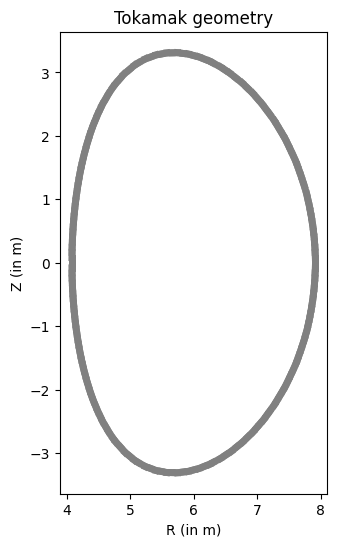

In [3]:
TOKmesh = Mesh('TRI03-MEGAFINE-LINEAR-REDUCED')
Equilibrium.TOKAMAK = Tokamak(WALL_MESH = TOKmesh)

Equilibrium.TOKAMAK.Plot()

# DEFINE INITIAL PLASMA BOUNDARY

PLASMA BOUNDARY PARAMETRISED USING LINEAR SOLUTION 0-LEVEL CONTOUR

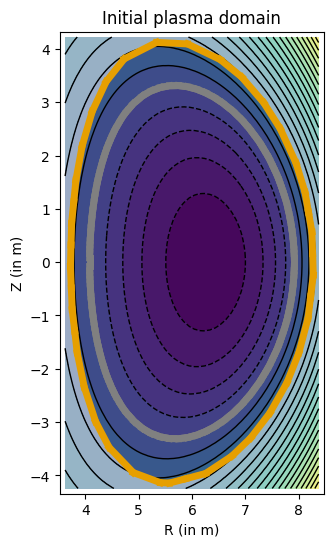

In [4]:
Equilibrium.initialPHI = InitialPlasmaBoundary(EQUILIBRIUM= Equilibrium,   
                                           GEOMETRY = 'LINEAR', # PREDEFINED MODEL
                                           R0 = 6.0,            # MEAN RADIUS          
                                           epsilon = 0.32,      # INVERSE ASPECT RATIO
                                           kappa = 1.7,         # ELONGATION
                                           delta = 0.33)        # TRIANGULARITY

Equilibrium.initialPHI.Plot()

# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX

LINEAR PLASMA CURRENT MODEL ANALYTICAL SOLUTION WITH NOISE

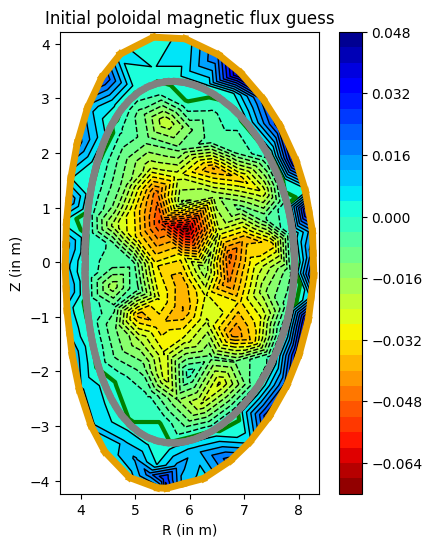

In [5]:
Equilibrium.initialPSI = InitialGuess(EQUILIBRIUM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE

Equilibrium.initialPSI.Plot()

# DEFINE PLASMA CURRENT MODEL

LINEAR PLASMA CURRENT MODEL

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/PlasmaCurrent.py:375: UserWarning: No contour levels were found within the data range.
  contour0 = ax.tricontour(self.eq.MESH.X[:,0],self.eq.MESH.X[:,1],Jphi,levels=[0],colors='black', linewidths=3)


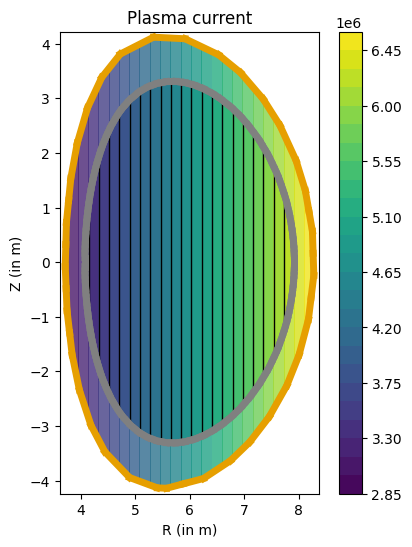

In [6]:
Equilibrium.PlasmaCurrent = CurrentModel(EQUILIBRIUM = Equilibrium,
                                     MODEL = 'LINEAR',  # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS          
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY

Equilibrium.PlasmaCurrent.Plot()

# RUN SIMULATION

PERFORM DOMAIN DISCRETISATION...
INITIALISATION TASKS...
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.11323587448268674 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.5053721433961758 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·1.9787398515475183
     Done!
     -> IDENTIFY ELEMENTS MESH RELATION...Done!
     -> COMPUTE STANDARD NUMERICAL INTEGRATION QUADRATURES...Done!
Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> COMPUTE PLASMA BOUNDARY APPROXIMATION QUADRATURES...Warning:  Element 13, subelem 0: surface integration quadrature is not accurate.
Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE GHOST FACES QUADRATURES...Done!
Done!
INITIALISE PSI...
     -> INITIALISE PSI ARRAYS...Done!
     -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!
     -> ASSIGN INITIAL PLASMA BOUNDARY VALUES...Done!
Done!
PREPARE OUTPUT DIRECTORY...Done!
INITIALI

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/_plot.py:222: UserWarning: No contour levels were found within the data range.
  contour1 = ax.tricontour(self.MESH.X[:,0],self.MESH.X[:,1], field, levels=[psisep], colors = 'black',linewidths=2)


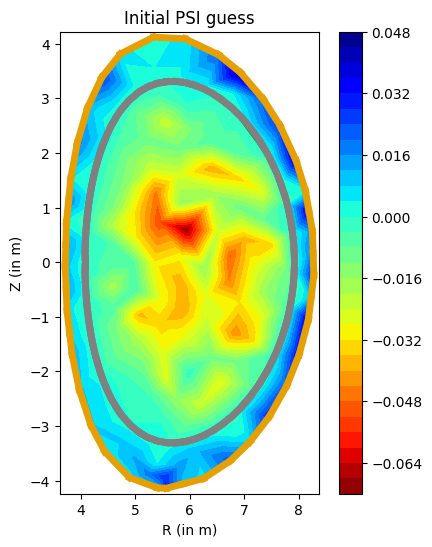

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Total current =  430679.74415249785
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!


/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/_plot.py:222: UserWarning: No contour levels were found within the data range.
  contour1 = ax.tricontour(self.MESH.X[:,0],self.MESH.X[:,1], field, levels=[psisep], colors = 'black',linewidths=2)


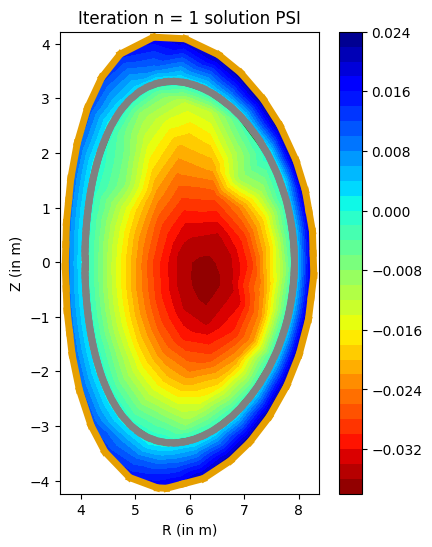

COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...Done!
SOLUTION CONVERGED


/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/_plot.py:222: UserWarning: No contour levels were found within the data range.
  contour1 = ax.tricontour(self.MESH.X[:,0],self.MESH.X[:,1], field, levels=[psisep], colors = 'black',linewidths=2)


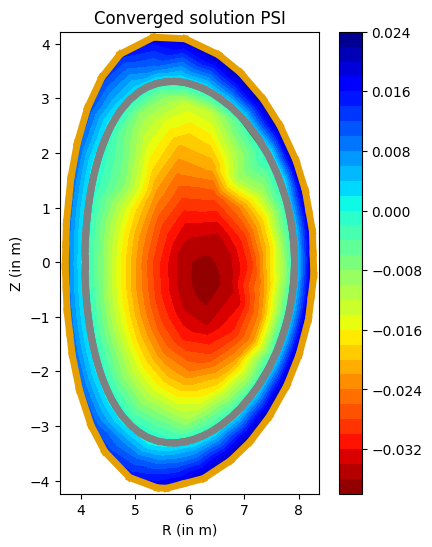

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/_L2error.py:153: RuntimeWarning: divide by zero encountered in scalar divide
  JumpRelError[knode] = diffgrad/abs(grad)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/_L2error.py:153: RuntimeWarning: invalid value encountered in scalar divide
  JumpRelError[knode] = diffgrad/abs(grad)


In [7]:
## INITIALISE MESH DATA
Equilibrium.DomainDiscretisation(INITIALISATION = True)
Equilibrium.InitialisePSI()

## NAME SIMULATION CASE 
CASE = "TS-FIXED-LINEAR-CutFEM"
## COMPUTE PLASMA EQUILIBRIUM
Equilibrium.EQUILI(CASE)

||PSIerror||_L2 =  0.0018603305728971304
relative ||PSIerror||_L2 =  0.11579487177093796
||PSIerror|| =  0.02428595130692854
||PSIerror||/node =  0.0001608341146154208
relative ||PSIerror|| =  2.5976467658816738


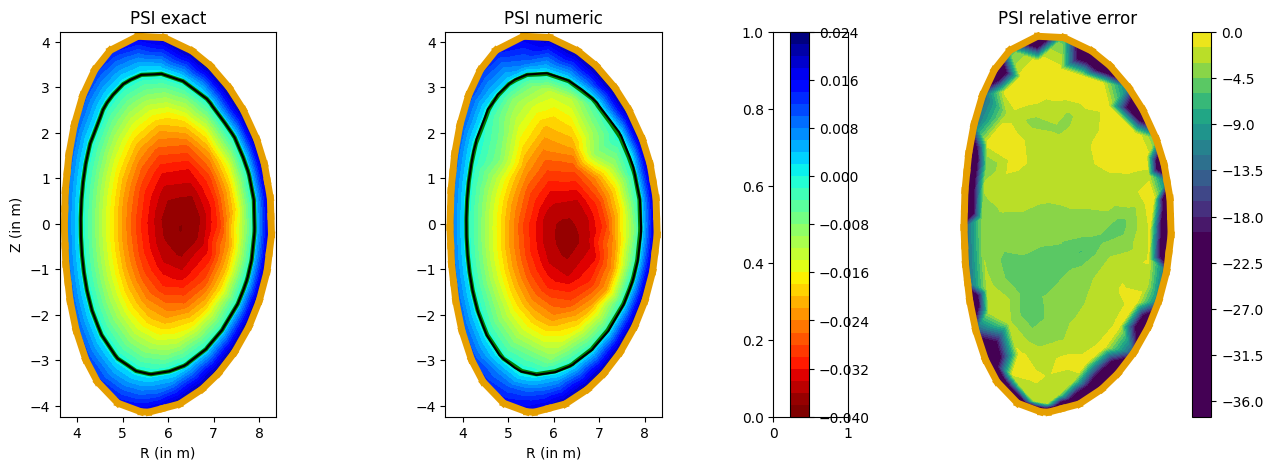

In [8]:
Equilibrium.PlotError(RelativeError=True)